<a href="https://colab.research.google.com/github/MuayThaiLegz/PracticeCrazy/blob/main/InterviewNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART I: DATA CLEANING (FILES: nsc.xlsx and op_studentdata)

In [181]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)


In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

op_studentdata = pd.read_excel('op_studentdata.xlsx')

op_studentdata.columns = op_studentdata.columns.str.replace(' ', '')

op_studentdata = op_studentdata.dropna(subset=['DateofBirth'])

op_studentdata.loc[:, 'contactid'] = op_studentdata['18-DigitCaseId'].str.upper()


print("Head of the DataFrame:")
display(op_studentdata.head())

print("\nDataFrame Info:")
op_studentdata.info()

print("\nDescriptive Statistics:")
formatted_stats = op_studentdata.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
display(formatted_stats)

print("\nColumn Names:")
display(op_studentdata.columns)



Head of the DataFrame:


,18-DigitCaseId,Gender,ScholarYear,Status,CumulativeGPA,TypeofCollege,OUSDRace,HouseholdAnnualIncome,Household#Supported,DateofBirth,contactid
0,5001K000012HXvFQAW,Female,NaN,Active,NaN,NaN,White,NaN,NaN,10/27/1991,5001K000012HXVFQAW
1,5001K000012HXvGQAW,Male,NaN,Active,NaN,NaN,Native Hawaiian/Pacific Islander,NaN,NaN,5/14/1993,5001K000012HXVGQAW
6,5001K000012HaFzQAK,Male,2018.0,Alumni,4.06,4 - Year,Native Hawaiian/Pacific Islander,NaN,NaN,9/1/2000,5001K000012HAFZQAK
8,5001K000012HaFjQAK,Female,2018.0,Alumni,3.91,4 - Year,Native Hawaiian/Pacific Islander,NaN,NaN,7/23/2000,5001K000012HAFJQAK
9,5001K000012HXvHQAW,Female,NaN,Active,NaN,NaN,White,NaN,NaN,8/28/1986,5001K000012HXVHQAW



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 54987
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   18-DigitCaseId         7805 non-null   object 
 1   Gender                 7782 non-null   object 
 2   ScholarYear            5600 non-null   float64
 3   Status                 7805 non-null   object 
 4   CumulativeGPA          6277 non-null   float64
 5   TypeofCollege          4118 non-null   object 
 6   OUSDRace               7747 non-null   object 
 7   HouseholdAnnualIncome  5108 non-null   object 
 8   Household#Supported    5564 non-null   float64
 9   DateofBirth            7805 non-null   object 
 10  contactid              7805 non-null   object 
dtypes: float64(3), object(8)
memory usage: 731.7+ KB

Descriptive Statistics:


,ScholarYear,CumulativeGPA,Household#Supported
count,5600.000000,6277.000000,5564.000000
mean,2020.718750,2.275648,19.498922
std,1.920366,1.741272,859.742578
min,2016.000000,0.000000,0.000000
25%,2019.000000,0.000000,3.000000
50%,2021.000000,3.000000,4.000000
75%,2022.000000,3.800000,5.000000
max,2023.000000,5.020000,59000.000000



Column Names:


Index(['18-DigitCaseId', 'Gender', 'ScholarYear', 'Status', 'CumulativeGPA',
       'TypeofCollege', 'OUSDRace', 'HouseholdAnnualIncome',
       'Household#Supported', 'DateofBirth', 'contactid'],
      dtype='object')

In [183]:

print('d. Question: How many unique students are there in this data set?')
print(f"Number of unique students in op_studentdata: {op_studentdata['contactid'].nunique()}")

d. Question: How many unique students are there in this data set?
Number of unique students in op_studentdata: 7528


In [184]:

display(op_studentdata.isna().sum())


cols_to_convert = [
    'HouseholdAnnualIncome', 'Household#Supported',
]
for col in cols_to_convert:
    op_studentdata[col] = pd.to_numeric(op_studentdata[col], errors='coerce')

for col in ['HouseholdAnnualIncome', 'Household#Supported','CumulativeGPA']:
    op_studentdata[col] = op_studentdata[col].fillna(op_studentdata[col].median())


for col in ['Gender', 'ScholarYear', 'TypeofCollege', 'OUSDRace']:
    op_studentdata[col] = op_studentdata[col].fillna(op_studentdata[col].mode()[0])


display(op_studentdata.isna().sum())

,0
18-DigitCaseId,0
Gender,23
ScholarYear,2205
Status,0
CumulativeGPA,1528
TypeofCollege,3687
OUSDRace,58
HouseholdAnnualIncome,2697
Household#Supported,2241
DateofBirth,0


,0
18-DigitCaseId,0
Gender,0
ScholarYear,0
Status,0
CumulativeGPA,0
TypeofCollege,0
OUSDRace,0
HouseholdAnnualIncome,0
Household#Supported,0
DateofBirth,0


In [185]:


nsc_data = pd.read_excel('nsc.xlsx', header=1)

nsc_data.columns = nsc_data.columns.str.replace(' ', '')

nsc_data['contactid'] = nsc_data['RequesterReturnField'].str.rstrip('_')

print(f"Number of unique students in nsc_data: {nsc_data['contactid'].nunique()}")



Number of unique students in nsc_data: 6230


In [186]:

print("Head of the DataFrame:")
display(nsc_data.head())

print("\nDataFrame Info:")
nsc_data.info()

print("\nDescriptive Statistics:")

display(nsc_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

print("\nColumn Names:")
display(nsc_data.columns)




Head of the DataFrame:


,RequesterReturnField,RecordFoundY/N,CollegeName,CollegeState,2-year/4-year,Public/Private,EnrollmentBegin,EnrollmentEnd,EnrollmentStatus,ClassLevel,Graduated?,GraduationDate,DegreeTitle,contactid
0,20190601_,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,20190601
1,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20200824.0,20201218.0,,A,N,NaN,NaN,5001K000012HYXTQAG
3,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20210125.0,20210528.0,,A,N,NaN,NaN,5001K000012HYXTQAG
4,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20210614.0,20210722.0,,A,N,NaN,NaN,5001K000012HYXTQAG



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RequesterReturnField  31879 non-null  object 
 1   RecordFoundY/N        31881 non-null  object 
 2   CollegeName           30383 non-null  object 
 3   CollegeState          30383 non-null  object 
 4   2-year/4-year         30383 non-null  object 
 5   Public/Private        30383 non-null  object 
 6   EnrollmentBegin       29311 non-null  float64
 7   EnrollmentEnd         29311 non-null  float64
 8   EnrollmentStatus      30383 non-null  object 
 9   ClassLevel            28612 non-null  object 
 10  Graduated?            31881 non-null  object 
 11  GraduationDate        1072 non-null   float64
 12  DegreeTitle           984 non-null    object 
 13  contactid             31879 non-null  object 
dtypes: float64(3), object(11)
memory usage: 3.4+ MB

Desc

,EnrollmentBegin,EnrollmentEnd,GraduationDate
count,29311.000000,29311.000000,1072.000000
mean,20215350.958889,20215709.046740,20220430.147388
std,17220.670192,17230.908671,10699.418206
min,20170522.000000,20170619.000000,20190524.000000
25%,20200824.000000,20201218.000000,20210682.000000
50%,20220124.000000,20220525.000000,20220610.500000
75%,20230403.000000,20230615.000000,20230527.000000
max,20240305.000000,20240614.000000,20240126.000000



Column Names:


Index(['RequesterReturnField', 'RecordFoundY/N', 'CollegeName', 'CollegeState',
       '2-year/4-year', 'Public/Private', 'EnrollmentBegin', 'EnrollmentEnd',
       'EnrollmentStatus', 'ClassLevel', 'Graduated?', 'GraduationDate',
       'DegreeTitle', 'contactid'],
      dtype='object')

In [187]:

for col in ['EnrollmentBegin', 'EnrollmentEnd', 'GraduationDate']:
    nsc_data[col] = pd.to_datetime(nsc_data[col], format='%Y%m%d', errors='coerce')




In [188]:

# Merge the datasets on 'contactid'

merged_data = pd.merge(nsc_data, op_studentdata, on='contactid', how='outer')


In [189]:

# Count students that exist in both datasets (where neither 18-DigitCaseId nor RequesterReturnField is NaN)
students_in_both = merged_data.dropna(subset=['18-DigitCaseId', 'RequesterReturnField']).shape[0]
print(f"Number of students in both datasets: {students_in_both}")


Number of students in both datasets: 22359


In [190]:

# Count students that are in salesforce data (op_studentdata) but not in NSC data
students_in_salesforce_only = merged_data[merged_data['RequesterReturnField'].isna()].shape[0]
print(f"Number of students only in the salesforce data: {students_in_salesforce_only}")


Number of students only in the salesforce data: 2801


In [191]:

# Count students that are in NSC data but not in salesforce data (op_studentdata)
students_in_nsc_only = merged_data[merged_data['18-DigitCaseId'].isna()].shape[0]
print(f"Number of students only in the NSC data: {students_in_nsc_only}")


Number of students only in the NSC data: 9678


In [192]:

# Total number of unique graduates in the NSC data
total_graduates_nsc = nsc_data[nsc_data['Graduated?'] == 'Y']['contactid'].nunique()
print(f"Total graduates in the NSC data: {total_graduates_nsc}")

# Graduates who are present in both datasets
graduates_in_both = merged_data[(merged_data['Graduated?'] == 'Y') & (~merged_data['18-DigitCaseId'].isna())]['contactid'].nunique()
print(f"Total graduates in both datasets: {graduates_in_both}")


Total graduates in the NSC data: 736
Total graduates in both datasets: 345


In [193]:

merged_data['EnrollBeginDate'] = pd.to_datetime(merged_data['EnrollmentBegin'], format='%Y%m%d', errors='coerce')
merged_data['GraduationDate'] = pd.to_datetime(merged_data['GraduationDate'], format='%Y%m%d', errors='coerce')
merged_data = merged_data.dropna(subset=['EnrollBeginDate', 'GraduationDate'], how='all')


aggregated_data = merged_data.groupby('contactid').agg(
    first_enrollment=('EnrollBeginDate', 'min'),
    latest_enrollment=('EnrollBeginDate', 'max'),
    first_graduation=('GraduationDate', 'min')
).reset_index()

merged_with_aggregated  = pd.merge(aggregated_data, merged_data, on='contactid', how='left')


def select_final_row(group):
    if not group['first_graduation'].isna().all():  # If the student has graduated
        return group.loc[group['first_graduation'].idxmax()]  # Keep the row with the graduation date
    else:
        return group.loc[group['latest_enrollment'].idxmax()]  # Otherwise, keep the row with the latest enrollment

final_data = merged_with_aggregated.groupby('contactid').apply(select_final_row).reset_index(drop=True)


display(final_data)

,contactid,first_enrollment,latest_enrollment,first_graduation,RequesterReturnField,RecordFoundY/N,CollegeName,CollegeState,2-year/4-year,Public/Private,...,Gender,ScholarYear,Status,CumulativeGPA,TypeofCollege,OUSDRace,HouseholdAnnualIncome,Household#Supported,DateofBirth,EnrollBeginDate
0,5001K000012HA00QAC,2019-08-19,2021-01-19,NaT,5001K000012HA00QAC_,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4,Public,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,60000.0,5.0,9/23/2001,2019-08-19
1,5001K000012HA01QAC,2019-09-26,2023-04-03,2023-06-16,5001K000012HA01QAC_,Y,UNIVERSITY OF CALIFORNIA-LOS ANGELES,CA,4,Public,...,Female,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,56572.0,5.0,2/14/2001,2019-09-26
2,5001K000012HA02QAC,2019-08-19,2023-01-17,2023-05-13,5001K000012HA02QAC_,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4,Public,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,101747.0,5.0,12/20/2000,2019-08-19
3,5001K000012HA04QAC,2019-09-03,2023-01-17,2023-05-12,5001K000012HA04QAC_,Y,UNIVERSITY OF PUGET SOUND,WA,4,Private,...,Male,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,27000.0,2.0,3/27/2001,2019-09-03
4,5001K000012HA05QAC,2019-06-10,2024-01-29,NaT,5001K000012HA05QAC_,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4,Public,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,23118.0,2.0,6/22/2001,2019-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,500AJ000001E5U2YAC,2023-08-21,2024-01-22,NaT,500AJ000001E5U2YAC_,Y,COLLEGE OF ALAMEDA,CA,2,Public,...,Woman,2023.0,Active,4.00,2 - Year,Hispanic/Latino,53085.0,4.0,11/14/2005,2023-08-21
4730,500AJ000001E6I4YAK,2023-08-23,2024-01-16,NaT,500AJ000001E6I4YAK_,Y,UNIVERSITY OF CALIFORNIA - MERCED,CA,4,Public,...,Other,2023.0,Applicant,2.96,4 - Year,Hispanic/Latino,6000.0,2.0,10/23/2005,2023-08-23
4731,500AJ000001E6JDYA0,2023-08-21,2024-01-29,NaT,500AJ000001E6JDYA0_,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4,Public,...,Man,2023.0,Applicant,3.80,4 - Year,Hispanic/Latino,0.0,4.0,12/14/2004,2023-08-21
4732,500AJ000001E6OCYA0,2023-08-16,2023-08-16,NaT,500AJ000001E6OCYA0_,Y,CHABOT COLLEGE,CA,2,Public,...,Man,2023.0,Active,2.87,2 - Year,Hispanic/Latino,32927.0,4.0,1/7/2005,2023-08-16


In [194]:

final_data['DateofBirth'] = pd.to_datetime(final_data['DateofBirth'], format='%m/%d/%Y', errors='coerce')

final_data['AgeAtGraduation'] = (final_data['GraduationDate'] - final_data['DateofBirth']).dt.days // 365.25

print(f"Average age at graduation: {final_data[final_data['GraduationDate'].notna()]['AgeAtGraduation'].mean()}")
print(f"Median age at graduation: {final_data[final_data['GraduationDate'].notna()]['AgeAtGraduation'].median()}")

final_data.to_excel("step1.xlsx", index=False)

display(final_data)


Average age at graduation: 20.238095238095237
Median age at graduation: 20.0


,contactid,first_enrollment,latest_enrollment,first_graduation,RequesterReturnField,RecordFoundY/N,CollegeName,CollegeState,2-year/4-year,Public/Private,...,ScholarYear,Status,CumulativeGPA,TypeofCollege,OUSDRace,HouseholdAnnualIncome,Household#Supported,DateofBirth,EnrollBeginDate,AgeAtGraduation
0,5001K000012HA00QAC,2019-08-19,2021-01-19,NaT,5001K000012HA00QAC_,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4,Public,...,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,60000.0,5.0,2001-09-23,2019-08-19,NaN
1,5001K000012HA01QAC,2019-09-26,2023-04-03,2023-06-16,5001K000012HA01QAC_,Y,UNIVERSITY OF CALIFORNIA-LOS ANGELES,CA,4,Public,...,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,56572.0,5.0,2001-02-14,2019-09-26,NaN
2,5001K000012HA02QAC,2019-08-19,2023-01-17,2023-05-13,5001K000012HA02QAC_,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4,Public,...,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,101747.0,5.0,2000-12-20,2019-08-19,NaN
3,5001K000012HA04QAC,2019-09-03,2023-01-17,2023-05-12,5001K000012HA04QAC_,Y,UNIVERSITY OF PUGET SOUND,WA,4,Private,...,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,27000.0,2.0,2001-03-27,2019-09-03,NaN
4,5001K000012HA05QAC,2019-06-10,2024-01-29,NaT,5001K000012HA05QAC_,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4,Public,...,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,23118.0,2.0,2001-06-22,2019-06-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,500AJ000001E5U2YAC,2023-08-21,2024-01-22,NaT,500AJ000001E5U2YAC_,Y,COLLEGE OF ALAMEDA,CA,2,Public,...,2023.0,Active,4.00,2 - Year,Hispanic/Latino,53085.0,4.0,2005-11-14,2023-08-21,NaN
4730,500AJ000001E6I4YAK,2023-08-23,2024-01-16,NaT,500AJ000001E6I4YAK_,Y,UNIVERSITY OF CALIFORNIA - MERCED,CA,4,Public,...,2023.0,Applicant,2.96,4 - Year,Hispanic/Latino,6000.0,2.0,2005-10-23,2023-08-23,NaN
4731,500AJ000001E6JDYA0,2023-08-21,2024-01-29,NaT,500AJ000001E6JDYA0_,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4,Public,...,2023.0,Applicant,3.80,4 - Year,Hispanic/Latino,0.0,4.0,2004-12-14,2023-08-21,NaN
4732,500AJ000001E6OCYA0,2023-08-16,2023-08-16,NaT,500AJ000001E6OCYA0_,Y,CHABOT COLLEGE,CA,2,Public,...,2023.0,Active,2.87,2 - Year,Hispanic/Latino,32927.0,4.0,2005-01-07,2023-08-16,NaN


In [249]:
final_data.to_excel("step1.xlsx", index=False)

In [250]:
final_data = pd.read_excel('step1.xlsx')

In [257]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# With all years of data

data_2018_scholars = final_data#[final_data['ScholarYear'] == 2018]
data_2018_scholars = data_2018_scholars[(data_2018_scholars['CumulativeGPA'].notna()) & (data_2018_scholars['CumulativeGPA'] != 0)]
data_2018_scholars['Graduated'] = data_2018_scholars['Status'].apply(lambda x: 1 if x == 'Alumni' else 0)

data_2018_scholars.drop(columns=['AgeAtGraduation','2-year/4-year'], inplace=True)


<ipython-input-257-a2cb71423bed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_scholars['Graduated'] = data_2018_scholars['Status'].apply(lambda x: 1 if x == 'Alumni' else 0)
<ipython-input-257-a2cb71423bed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_scholars.drop(columns=['AgeAtGraduation','2-year/4-year'], inplace=True)


In [258]:
def plot_confusion_matrix(cm):
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')  # Add this line to set the y-axis label
  plt.title('Confusion Matrix')
  plt.show()

def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print(f"False Positive Rate: {fpr}")
    print(f"True Positive Rate: {tpr}")

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC-AUC Score: {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [300]:
X = data_2018_scholars[['HouseholdAnnualIncome','CumulativeGPA','Household#Supported']]  # Add more independent variables if needed
y = data_2018_scholars['Graduated']  # Dependent variable


Optimization terminated successfully.
         Current function value: 0.164965
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              Graduated   No. Observations:                 2723
Model:                          Logit   Df Residuals:                     2719
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                 0.03169
Time:                        23:39:22   Log-Likelihood:                -449.20
converged:                       True   LL-Null:                       -463.90
Covariance Type:            nonrobust   LLR p-value:                 1.841e-06
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.0863      0.799     -7.619      0.000      -7.652      -4

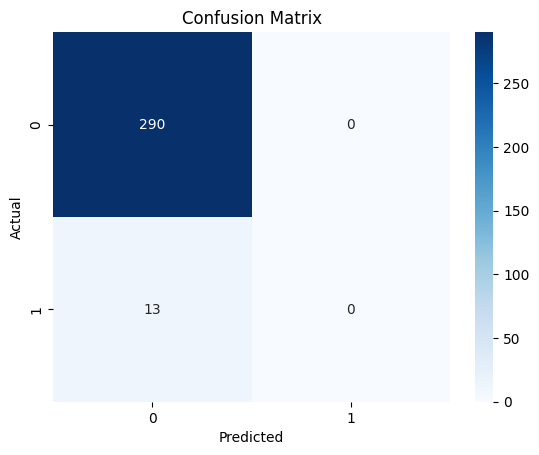


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       0.00      0.00      0.00        13

    accuracy                           0.96       303
   macro avg       0.48      0.50      0.49       303
weighted avg       0.92      0.96      0.94       303

False Positive Rate: [0.         0.00344828 0.00344828 0.06551724 0.07241379 0.07241379
 0.12068966 0.12758621 0.17586207 0.18275862 0.2        0.2
 0.2137931  0.2137931  0.22068966 0.23103448 0.27241379 0.28275862
 0.3        0.3        0.30344828 0.31034483 0.32068966 0.32758621
 0.33448276 0.34827586 0.35172414 0.36896552 0.37586207 0.38275862
 0.38275862 0.40344828 0.41034483 0.48275862 0.48275862 0.50344828
 0.52068966 0.56206897 0.57241379 0.57931034 0.68275862 0.68965517
 0.72068966 0.72758621 0.74482759 0.80689655 0.80689655 0.83103448
 0.83793103 0.94827586 0.94827586 1.        ]
True Positive Rate: [0.         0.         0.07692308

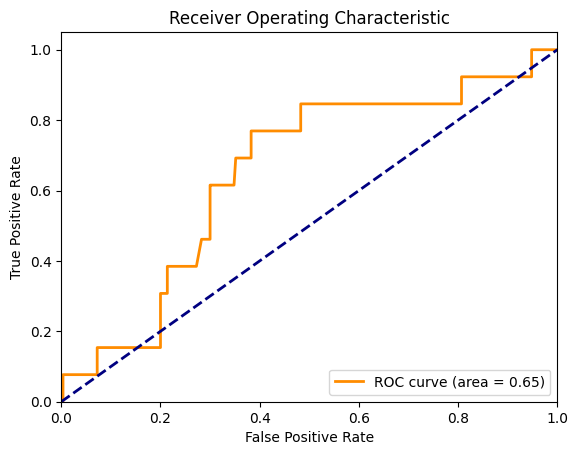

In [303]:
SM_X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(SM_X, y, test_size=0.1, random_state=42)

model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

y_pred_prob = results.predict(X_test)

y_pred = np.where(y_pred_prob > 0.5, 1, 0)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

PR_curve = plot_roc_curve(y_test, y_pred_prob)

Accuracy: 0.9570957095709571
Confusion Matrix:


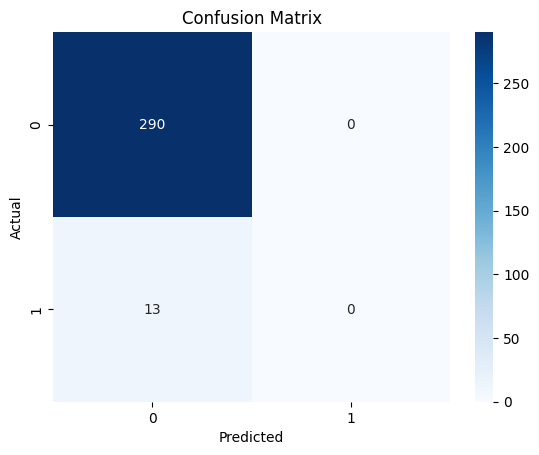


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       0.00      0.00      0.00        13

    accuracy                           0.96       303
   macro avg       0.48      0.50      0.49       303
weighted avg       0.92      0.96      0.94       303

False Positive Rate: [0.         0.00344828 0.02758621 0.03448276 0.06206897 0.06896552
 0.16551724 0.17241379 0.17931034 0.1862069  0.20344828 0.21034483
 0.2137931  0.22068966 0.24827586 0.24827586 0.29310345 0.29310345
 0.34482759 0.36206897 0.39655172 0.40689655 0.41724138 0.43448276
 0.44137931 0.44137931 0.45172414 0.45862069 0.46206897 0.46551724
 0.46896552 0.47931034 0.4862069  0.4862069  0.48965517 0.5
 0.50689655 0.51724138 0.51724138 0.52068966 0.52068966 0.53793103
 0.54482759 0.70689655 0.70689655 0.78965517 0.79655172 0.79655172
 0.8        0.80689655 0.94137931 0.94137931 0.94827586 0.94827586
 1.        ]
True Positive Rate:

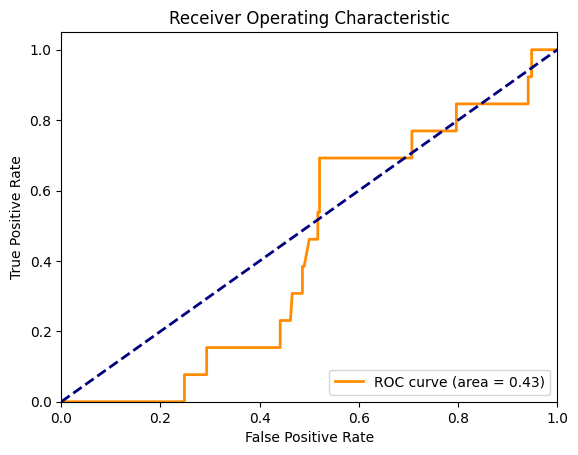

In [261]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

PR_curve = plot_roc_curve(y_test, y_pred_prob)


Accuracy: 0.9570957095709571


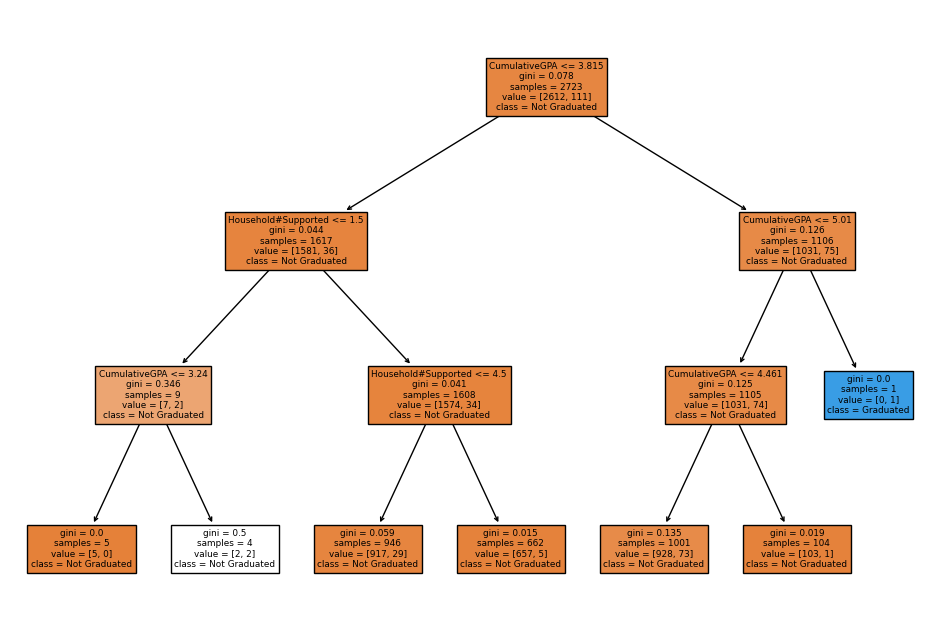

|--- CumulativeGPA <= 3.81
|   |--- Household#Supported <= 1.50
|   |   |--- CumulativeGPA <= 3.24
|   |   |   |--- class: 0
|   |   |--- CumulativeGPA >  3.24
|   |   |   |--- class: 0
|   |--- Household#Supported >  1.50
|   |   |--- Household#Supported <= 4.50
|   |   |   |--- class: 0
|   |   |--- Household#Supported >  4.50
|   |   |   |--- class: 0
|--- CumulativeGPA >  3.81
|   |--- CumulativeGPA <= 5.01
|   |   |--- CumulativeGPA <= 4.46
|   |   |   |--- class: 0
|   |   |--- CumulativeGPA >  4.46
|   |   |   |--- class: 0
|   |--- CumulativeGPA >  5.01
|   |   |--- class: 1



In [262]:
from sklearn.tree import plot_tree, export_text


treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train, y_train)

y_pred = treemodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
plt.figure(figsize=(12, 8))
plot_tree(treemodel, feature_names=['HouseholdAnnualIncome','CumulativeGPA','Household#Supported'], class_names=['Not Graduated', 'Graduated'], filled=True)
plt.show()
tree_text = export_text(treemodel, feature_names=['HouseholdAnnualIncome','CumulativeGPA','Household#Supported'])
print(tree_text)


Subject: Analysis of Factors Influencing Student Graduation
Introduction:
Our analysis aimed to understand the factors that influence whether a student will graduate, using two different models: a Logistic Regression Model and a Decision Tree Classifier. These models were trained on data related to students' academic performance, household income, and family size.

Key Findings:

GPA is Crucial: Across both models, a student's GPA emerged as the most significant factor in predicting whether they would graduate. Higher GPAs are strongly linked to graduation, emphasizing the importance of academic performance.

Decision Tree Insights: The Decision Tree model provided a detailed structure showing how different factors interact to predict graduation. The tree's structure revealed that:

Students with a GPA above 3.81 have a higher likelihood of graduating. Within this group, those with a GPA above 5.01 were the most likely to graduate.
Household Size and GPA Interactions: For students with a GPA below 3.81, the household size became a more relevant factor. Specifically, students from smaller households (supporting fewer than 1.5 people) with a GPA lower than 3.24 were less likely to graduate. This suggests that in cases where GPA is lower, the number of people supported by the household could have an additional impact, possibly due to the distribution of resources or attention.
Overall Pattern: Despite these nuances, the majority of the decision paths led to predicting non-graduation, especially when GPAs were on the lower end. The tree highlighted that even small changes in GPA could significantly shift the prediction, emphasizing its critical role in determining graduation outcomes.
Other Factors Less Significant: Contrary to what might be expected, household income and the number of people supported by the student's household were not strong predictors of graduation in isolation. However, in the Decision Tree, household size did interact with GPA to some extent, showing a nuanced influence in specific scenarios.

Model Performance:

Both models achieved high accuracy (around 96%), but this was largely due to their ability to correctly predict the majority outcome (students not graduating). Unfortunately, both models struggled to correctly predict when students would graduate, indicating a bias towards predicting non-graduation.
The Decision Tree model, in particular, provided a visual representation of how decisions were made, making it easier to understand how different factors influenced the prediction. It highlighted critical GPA thresholds that significantly impacted graduation likelihood.
Recommendations:

Focus on GPA Improvement: Given the strong link between GPA and graduation, it is recommended that resources be directed towards helping students improve their academic performance. This could include tutoring, study groups, and other academic support services.

Further Research Needed: While income and family size were not significant in our models, other factors that were not captured in this analysis may be influencing graduation rates. We recommend further research to explore additional variables, such as extracurricular involvement, mental health, and school engagement.

Tailored Interventions: A one-size-fits-all approach may not be effective. Tailored interventions that address individual student needs, particularly those at risk of low academic performance, could yield better outcomes. Specifically, students with lower GPAs in larger households may require additional support to overcome the unique challenges they face.

Conclusion:
Understanding the factors that affect student graduation is a complex task. While academic performance, especially GPA, is clearly important, our analysis suggests that more research is needed to uncover other critical factors. The Decision Tree model's insights into the interaction between GPA and household size provide valuable direction for further investigation. We recommend focusing on academic support while continuing to explore other influences on student success.

In [284]:


returns_on_education = pd.read_csv('returns_on_education.csv').drop(columns = 'id')

returns_on_education['income'] = pd.to_numeric(returns_on_education['income'], errors='coerce')

returns_on_education = returns_on_education.dropna()

returns_on_education = pd.get_dummies(returns_on_education, columns=['gender'], drop_first=True)
returns_on_education['gender_Male'] = returns_on_education['gender_Male'].astype(int)


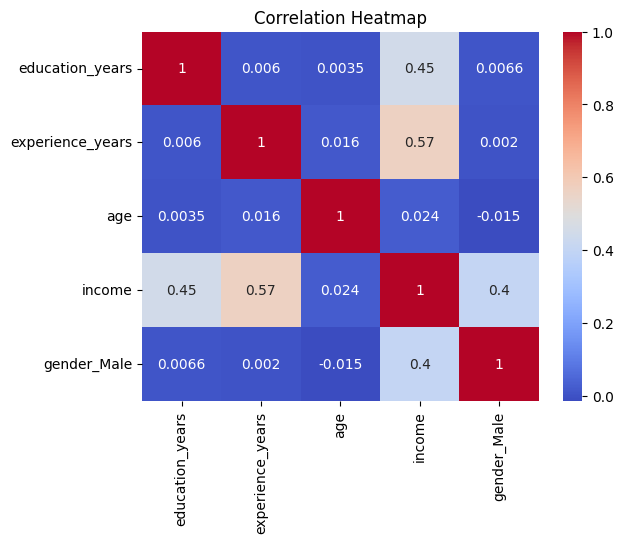

In [285]:
sns.heatmap(returns_on_education.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     4650.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:25:41   Log-Likelihood:                -88754.
No. Observations:                9000   AIC:                         1.775e+05
Df Residuals:                    8995   BIC:                         1.776e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7940.5670    350.589  

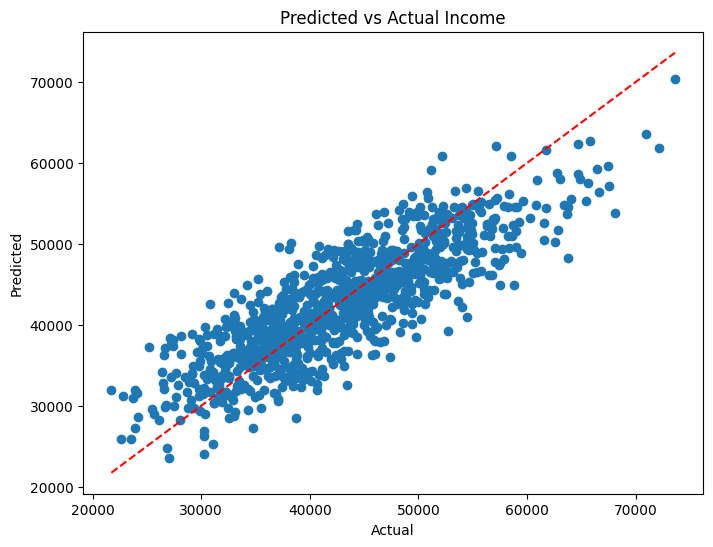

In [290]:

X = returns_on_education[['age', 'experience_years', 'education_years', 'gender_Male']]
y = returns_on_education['income']

SM_X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(SM_X, y, test_size=0.1, random_state=42)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 4. Residual Standard Error (RSE)
rse = np.sqrt(np.sum((y_test - y_pred)**2) / (len(y_test) - len(model.params)))
print(f"Residual Standard Error (RSE): {rse}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Income')
plt.show()

Mean Squared Error (MSE): 44814428.93213593
Root Mean Squared Error (RMSE): 6694.357992528928
Mean Absolute Error (MAE): 5302.651846626196
Residual Standard Error (RSE): 6707.787009019399
feature importances:[0.08340333 0.4293595  0.32457755 0.16265962] feature names:Index(['age', 'experience_years', 'education_years', 'gender_Male'], dtype='object')


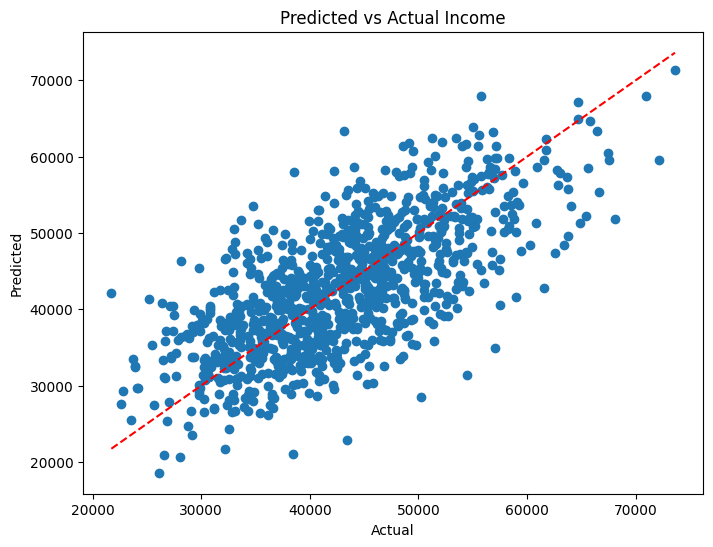

In [296]:
# Using DecisionTreeRegressor Model looking for Non-linear relationships:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


X = returns_on_education[['age', 'experience_years', 'education_years', 'gender_Male']]
y = returns_on_education['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rse = np.sqrt(np.sum((y_test - y_pred) ** 2) / (len(y_test) - X_train.shape[1]))
print(f"Residual Standard Error (RSE): {rse}")

print(f"feature importances:{model.feature_importances_} feature names:{X_test.columns}" )
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Income')
plt.show()

Understanding What Influences Income

Objective:
We wanted to see how different factors like age, work experience, education, and gender affect a person’s income. We used a statistical model to understand the impact of each factor.

Key Insights:

1. Experience and Education Are Key:

Experience: With each extra year of work, income tends to go up by about $911. This makes sense because more experience usually means better skills, which often lead to higher pay.
Education: Each additional year of education increases income by roughly $1,809. This shows how valuable education is; more schooling generally leads to better-paying jobs.
2. Gender Matters:

Being Male: According to the model, men earn about $6,548 more than women, even when we consider age, experience, and education. This suggests that a significant gender pay gap still exists.
3. Age Has a Smaller Impact:

Age: For every year of age, income goes up by just $11 on average. While this increase is real, it’s much smaller than the impact of experience or education. This suggests that age alone isn’t as important as the skills and qualifications you gain over time.
Model Performance:

Explained Variation: The model explains about 67% of the differences in income among the people in the dataset. This means that factors like age, experience, education, and gender are important, but there’s still 33% of income variation due to other factors we didn’t measure.

Prediction Accuracy:

Mean Squared Error (MSE): On average, the squared difference between the predicted and actual incomes is about $22 million. This number is big because of the squaring in the formula, so...
Root Mean Squared Error (RMSE): The RMSE is around $4,716, which gives a better sense of the average error in predicting income.
Mean Absolute Error (MAE): On average, the model’s predictions are off by about $3,762.
Visual Insights:

Predicted vs. Actual Income: A scatter plot comparing predicted income to actual income shows that while the model does a good job overall, there are still some errors. Ideally, the points would all be on a diagonal line, but they are scattered around it, indicating that the model isn't perfect.
Challenges and Considerations:

Given that the dataset is large and clean, there’s still much more insight we can extract. However, with smaller datasets, using more complex models could lead to overfitting—where the model performs well on the training data but poorly on new data. To avoid this, we used simpler models to ensure that the findings are reliable and applicable to a broader population.

Final Thoughts:

Education and Experience Pay Off: The analysis confirms that more education and experience are key to earning a higher income, which aligns with what we typically see in the job market.

Gender Disparities Exist: The significant income difference between men and women, even after considering other factors, highlights the ongoing issue of gender pay gaps.

Room for Improvement: While the model does a good job explaining income differences, it doesn’t cover everything. Factors like job type, industry, location, and personal networks likely play a big role in determining income but weren’t included in this analysis.

Conclusion:
This analysis sheds light on how education, experience, and gender influence income. It also underscores the importance of addressing gender pay gaps and suggests there’s more to explore in understanding all the factors that contribute to income levels.

Optimization terminated successfully.
         Current function value: 0.493014
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            gender_Male   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8995
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.2887
Time:                        23:29:16   Log-Likelihood:                -4437.1
converged:                       True   LL-Null:                       -6238.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3104      0.199    -16.674      0.000      -3.700      -2.921
age        

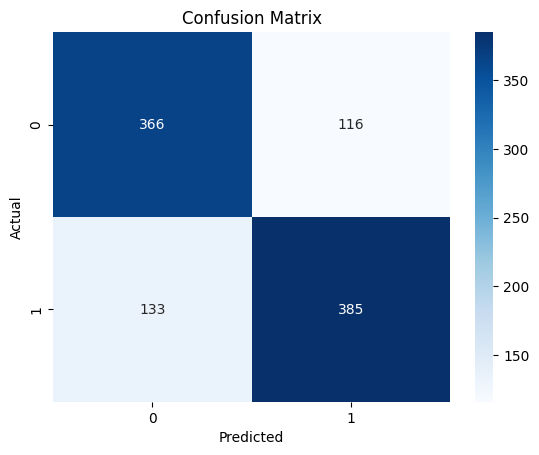


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       482
           1       0.77      0.74      0.76       518

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

False Positive Rate: [0.         0.         0.         0.00207469 0.00207469 0.00414938
 0.00414938 0.00622407 0.00622407 0.00829876 0.00829876 0.01037344
 0.01037344 0.01244813 0.01244813 0.01452282 0.01452282 0.01659751
 0.01659751 0.0186722  0.0186722  0.02074689 0.02074689 0.02282158
 0.02282158 0.02489627 0.02489627 0.02904564 0.02904564 0.03112033
 0.03112033 0.03319502 0.03319502 0.03526971 0.03526971 0.03941909
 0.03941909 0.04149378 0.04149378 0.04356846 0.04356846 0.04564315
 0.04564315 0.04979253 0.04979253 0.05186722 0.05186722 0.05394191
 0.05394191 0.0560166  0.0560166  0.05809129 0.05809129 0.06016598
 0.06016598 0.06224066 0.

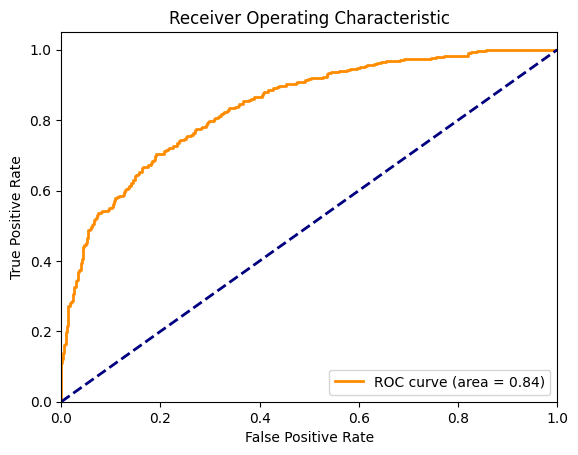

In [295]:
"""

Description of the Experiment


Objective:
Building on the previous analysis that revealed significant gender disparities in income, this experiment seeks to explore the reverse relationship: Can we predict a person’s gender based on factors such as age, years of experience, education, and income? Specifically, we want to understand how these factors are associated with the likelihood of being male.

Experiment Setup:

Variables:

Independent Variables (X): Age, years of experience, years of education, and income.
Dependent Variable (y): Gender (coded as 1 for male and 0 for female).
Methodology:

A Logistic Regression model is used because the goal is to predict a binary outcome (gender).
The dataset is split into a training set (90%) and a test set (10%) to build and evaluate the model.
Process:

The logistic regression model is fitted using the training data, and its performance is then assessed on the test data.
The model’s predictions are compared to the actual outcomes to calculate the accuracy and generate a confusion matrix.
Additional metrics like the classification report and ROC curve are used to evaluate how well the model distinguishes between males and females.

"""

X = returns_on_education[['age', 'experience_years', 'education_years', 'income']]
y = returns_on_education['gender_Male']

SM_X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(SM_X, y, test_size=0.1, random_state=42)

model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

y_pred_prob = results.predict(X_test)

y_pred = np.where(y_pred_prob > 0.5, 1, 0)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

PR_curve = plot_roc_curve(y_test, y_pred_prob)


Age:

Coefficient: -0.0060
Interpretation: For each additional year of age, the log odds of being male decrease by 0.006. Although the effect is small, it is statistically significant (p = 0.002), indicating that, in this dataset, older individuals are slightly more likely to be female.
Experience Years:

Coefficient: -0.2750
Interpretation: Each additional year of work experience decreases the log odds of being male by 0.275. This is a significant finding, suggesting that, within this dataset, women tend to have more work experience compared to men.
Education Years:

Coefficient: -0.5418
Interpretation: Each additional year of education decreases the log odds of being male by 0.542. This strong, significant effect implies that women in this dataset are more likely to have pursued higher levels of education.
Income:

Coefficient: 0.0003
Interpretation: Higher income is associated with a higher probability of being male. Despite the small coefficient, this relationship is highly significant (p < 0.0001), which suggests a consistent pattern where men tend to earn more than women in this dataset.
Model Performance
Accuracy: 75.1% of the predictions were correct. This suggests that the model has moderate predictive power, correctly identifying gender based on the input features three out of four times.
Confusion Matrix: The model has a relatively balanced performance, with slightly better precision for predicting males (1s) compared to females (0s).
ROC-AUC Score: A score of 0.839 suggests the model is quite effective at distinguishing between males and females, but there is still room for improvement.
Conclusion
The logistic regression analysis reveals important trends:

Income is a strong predictor of gender, with higher incomes more likely associated with being male.
Higher education and experience are more likely to be associated with being female in this dataset.
Age has a minor but significant influence, with older individuals being slightly more likely to be female.
While these findings are statistically significant, they reflect patterns in the dataset and should be interpreted with caution, as they may not fully represent broader societal trends. Further research with additional variables and potential correction for biases in the data would provide a more comprehensive understanding of the factors influencing gender and income.

Optimization terminated successfully.
         Current function value: 0.656566
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              graduated   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                 0.04792
Time:                        23:19:49   Log-Likelihood:                -1313.1
converged:                       True   LL-Null:                       -1379.2
Covariance Type:            nonrobust   LLR p-value:                 1.320e-27
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7525      0.384     -4.569      0.000      -2.504      -1.001
scholarship

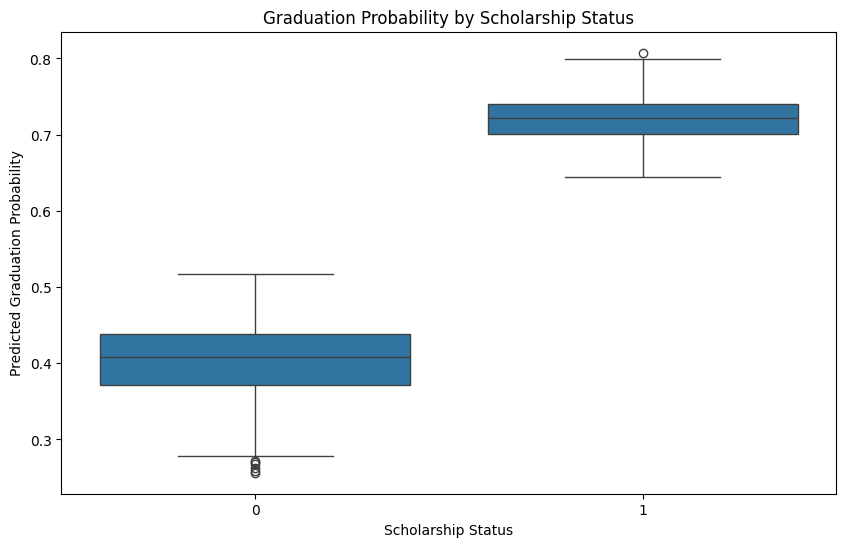

In [273]:

import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'scholarship_data.xlsx'
scholarship_data = pd.read_excel(file_path)


X = scholarship_data[['scholarship', 'gpa', 'household_income', 'first_generation']]
y = scholarship_data['graduated']

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()



print(model.summary())

scholarship_data['graduation_prob'] = model.predict(X)

plt.figure(figsize=(10, 6))
sns.boxplot(x='scholarship', y='graduation_prob', data=scholarship_data)
plt.title('Graduation Probability by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Predicted Graduation Probability')
plt.show()


Policy Memo: Impact of Scholarships on Graduation Outcomes

Overview:
This analysis was conducted to assess how receiving a scholarship affects a student's likelihood of graduating within six years after enrolling in post-secondary education. The data includes high school GPA, gender, ethnicity, household income, and whether the student received a scholarship and graduated.

Key Findings:

1. Positive Impact of Scholarships on Graduation:
Students who received a scholarship were much more likely to graduate. The analysis shows that scholarships increase the likelihood of graduation from around 44% to 74%. This significant finding highlights a strong positive relationship between receiving a scholarship and successful graduation.

2. Role of GPA:
High school GPA is a crucial predictor of graduation. Students with higher GPAs are more likely to graduate, emphasizing the importance of academic preparedness in higher education success.

3. Household Income and First-Generation Status:
Household income had a marginal effect on graduation rates, with a slight positive association. While not statistically significant, this suggests that financial stability may play a role in graduation outcomes. First-generation status did not show a significant impact on graduation likelihood compared to other students, but this may require further research with more detailed data.

Visual Insights:

Graduation Rate by Scholarship Status: A bar plot shows that students with scholarships have a considerably higher graduation rate than those without.
Graduation Rates by Gender: A count plot indicates that the positive impact of scholarships is consistent across genders, though more men than women do not graduate.
Challenges and Considerations:
The small dataset raised concerns about overfitting with complex models, which can lead to inaccurate predictions on new data. To ensure the reliability and applicability of the results, simpler statistical methods were used.

Conclusion:
This analysis underscores the importance of scholarships in helping students succeed in higher education. Scholarships not only provide essential financial support but also encourage students to complete their degrees. Policymakers should consider these findings when developing financial aid programs, as targeted scholarships can significantly boost graduation rates, particularly for students at risk of not finishing their education due to financial challenges. Further research could explore other factors, such as academic support services, that influence graduation outcomes.